In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import datetime
from scipy import stats
%config InlineBackend.figure_format = 'svg'

## Function Definitions

In [2]:
rating_re = re.compile(r'(\d+(\.\d+)?)/10')

In [3]:
def get_rating(text):
    m = rating_re.search(text)
    if m:
        rate = float(m.group(1))
        #return rate
        if rate > 20:
            return None
        else:
            return rate
    else:
        return None

get_rating = np.vectorize(get_rating, otypes=[np.float])

In [4]:
def parse_date(d):
    return datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S')

parse_date = np.vectorize(parse_date, otypes=[np.object_])

## Main Logic

In [5]:
# Option 1: parse the date strings yourself.
#data = pd.read_csv('dog_rates_tweets.csv')
#data['created_at'] = parse_date(data['created_at'])

In [6]:
# Option 2: ask Pandas to do it.
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])

In [7]:
data['rating'] = get_rating(data['text'])

In [8]:
data = data[data['rating'].notnull()]

In [9]:
data['timestamp'] = data['created_at'].apply(lambda d: d.timestamp())

In [10]:
fit = stats.linregress(data['timestamp'], data['rating'])

## Results

In [11]:
data['prediction'] = data['timestamp']*fit.slope + fit.intercept

In [12]:
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,b'This is Louie. He has misplaced his Cheerio....,14.0,1.525910e+09,13.706036
7,993889039714578432,2018-05-08 16:23:07,b'This is Manny. He hasn\xe2\x80\x99t seen you...,13.0,1.525797e+09,13.700870
8,993629544463642624,2018-05-07 23:11:58,b'This is Libby. She leap. 14/10\n(IG: libbyth...,14.0,1.525735e+09,13.698046
24,992198572664860672,2018-05-04 00:25:48,b'This is Rosie. She thought Coachella was thi...,13.0,1.525394e+09,13.682471
30,991744041351090177,2018-05-02 18:19:39,b'This is Riley. He\xe2\x80\x99ll be your chau...,13.0,1.525285e+09,13.677524
35,991399795892916224,2018-05-01 19:31:45,b'This is B-Mo. He has a heart on his butt and...,13.0,1.525203e+09,13.673777
41,990987750601093120,2018-04-30 16:14:26,b'Say hello to Meatball. I\xe2\x80\x99m told h...,13.0,1.525105e+09,13.669293
50,989657223084244992,2018-04-27 00:07:23,b'This is Oakley. He picked you some flowers. ...,14.0,1.524788e+09,13.654811
55,989300750152069120,2018-04-26 00:30:53,b'Meet Max. She pouts until someone holds her....,12.0,1.524703e+09,13.650931
59,989176681243070464,2018-04-25 16:17:53,b'This is Trout. He lives a life of luxury. Pr...,13.0,1.524673e+09,13.649581


In [13]:
fit.slope, fit.intercept

(4.56509413668822e-08, -55.95318015002793)

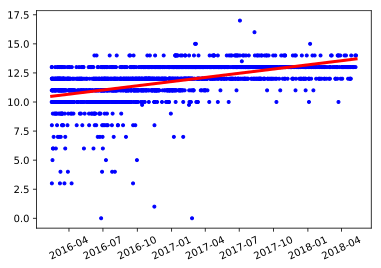

In [14]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()